In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.DataFrame({"Тяжесть заболевания, баллы": [0,0,1,1,1,1,1,1,2,2,3,3,3,4,5,5,5,6,9,11], 
                   "Коэффициент адгезии": [1,1.4,1,1,1.9,2,2.5,3,2,3.2,3,3.2,6.3,2.7,3,5,17,5.2,19.8,25]})

In [39]:
df.index += 1

## Визуальный анализ

In [40]:
df

,"Тяжесть заболевания, баллы",Коэффициент адгезии
1,0,1.0
2,0,1.4
3,1,1.0
4,1,1.0
5,1,1.9
6,1,2.0
7,1,2.5
8,1,3.0
9,2,2.0
10,2,3.2


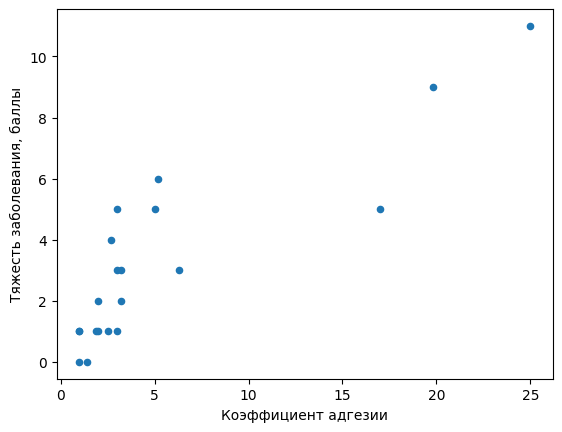

In [60]:
df.plot(x="Коэффициент адгезии", y="Тяжесть заболевания, баллы", kind="scatter")
plt.savefig("pic1")
plt.show()

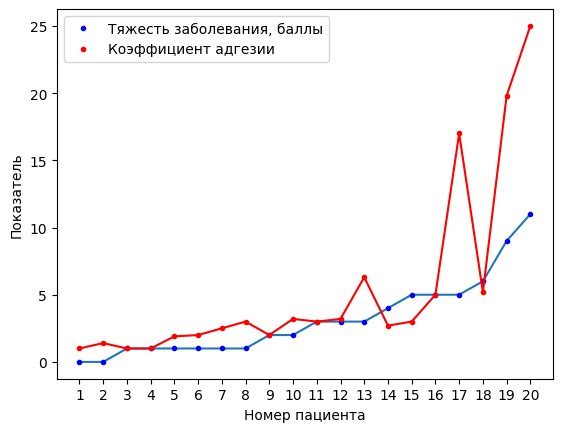

In [61]:
plt.plot(df.index, df["Тяжесть заболевания, баллы"])
line_blue, = plt.plot(df.index, df["Тяжесть заболевания, баллы"], 'b.')
plt.plot(df.index, df["Коэффициент адгезии"], 'r')
line_red, = plt.plot(df.index, df["Коэффициент адгезии"], 'r.')
plt.xlabel('Номер пациента')
plt.ylabel('Показатель')
plt.legend([line_blue, line_red], ["Тяжесть заболевания, баллы", "Коэффициент адгезии"])
plt.xticks(df.index)
plt.savefig("pic2")
plt.show()

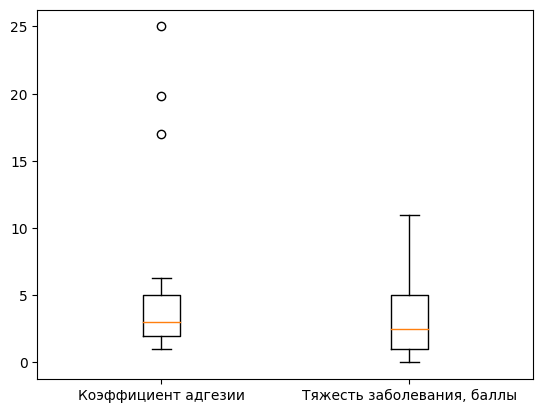

In [70]:
plt.boxplot([df["Коэффициент адгезии"], df["Тяжесть заболевания, баллы"]], labels=["Коэффициент адгезии", "Тяжесть заболевания, баллы"])
plt.savefig("pic3")
plt.show()

In [124]:
index_clear = list(range(1, 17))
index_clear.append(18)
df_clear = df.loc[index_clear]
df_clear

,"Тяжесть заболевания, баллы",Коэффициент адгезии
1,0,1.0
2,0,1.4
3,1,1.0
4,1,1.0
5,1,1.9
6,1,2.0
7,1,2.5
8,1,3.0
9,2,2.0
10,2,3.2


## Описательный анализ

In [97]:
df.describe()

,"Тяжесть заболевания, баллы",Коэффициент адгезии
count,20.000000,20.000000
mean,3.200000,5.460000
std,2.948684,6.802198
min,0.000000,1.000000
25%,1.000000,1.975000
50%,2.500000,3.000000
75%,5.000000,5.050000
max,11.000000,25.000000


In [89]:
# Мода
df.mode()

,"Тяжесть заболевания, баллы",Коэффициент адгезии
0,1.0,1.0
1,NaN,3.0


In [83]:
# Дисперсия
df.var()

Тяжесть заболевания, баллы     8.694737
Коэффициент адгезии           46.269895
dtype: float64

In [127]:
df_clear.describe()

,"Тяжесть заболевания, баллы",Коэффициент адгезии
count,17.000000,17.000000
mean,2.294118,2.788235
std,1.829095,1.523927
min,0.000000,1.000000
25%,1.000000,1.900000
50%,2.000000,2.700000
75%,3.000000,3.200000
max,6.000000,6.300000


In [125]:
# Мода
df_clear.mode()

,"Тяжесть заболевания, баллы",Коэффициент адгезии
0,1.0,1.0
1,NaN,3.0


In [126]:
# Дисперсия
df_clear.var()

Тяжесть заболевания, баллы    3.345588
Коэффициент адгезии           2.322353
dtype: float64

## Проверка нормальности распределения

In [135]:
stat, p1 = stats.shapiro(df_clear["Коэффициент адгезии"])
stat, p2 = stats.shapiro(df_clear["Тяжесть заболевания, баллы"])
print("Критерий Шапиро-Уилка")
print('Коэффициент адгезии p-value=%.5f' % p1)
print('Тяжесть заболевания, баллы p-value=%.5f' % p2)

Критерий Шапиро-Уилка
Коэффициент адгезии p-value=0.06570
Тяжесть заболевания, баллы p-value=0.06533


In [136]:
stat, p1 = stats.normaltest(df_clear["Коэффициент адгезии"])
stat, p2 = stats.normaltest(df_clear["Тяжесть заболевания, баллы"])
print("Критерий Пирсона")
print('Коэффициент адгезии p-value=%.5f' % p1)
print('Тяжесть заболевания, баллы p-value=%.5f' % p2)

Критерий Пирсона
Коэффициент адгезии p-value=0.18397
Тяжесть заболевания, баллы p-value=0.39324


In [137]:
stat, p1 = stats.chisquare(df_clear["Коэффициент адгезии"])
stat, p2 = stats.chisquare(df_clear["Тяжесть заболевания, баллы"])
print("Критерий Хи-квадрат")
print('Коэффициент адгезии p-value=%.5f' % p1)
print('Тяжесть заболевания, баллы p-value=%.5f' % p2)

Критерий Хи-квадрат
Коэффициент адгезии p-value=0.64875
Тяжесть заболевания, баллы p-value=0.10511


In [141]:
stat, p1 = stats.kstest(df_clear["Коэффициент адгезии"], stats.norm.cdf)
stat, p2 = stats.kstest(df_clear["Тяжесть заболевания, баллы"], stats.norm.cdf)
print("Критерий Колмогорова-Смирнова")
print('Коэффициент адгезии p-value=%.15f' % p1)
print('Тяжесть заболевания, баллы p-value=%.10f' % p2)

Критерий Колмогорова-Смирнова
Коэффициент адгезии p-value=0.000000000000054
Тяжесть заболевания, баллы p-value=0.0000000014


## Корреляция

In [143]:
c, p = stats.spearmanr(df_clear["Коэффициент адгезии"], df_clear["Тяжесть заболевания, баллы"])
print(c)

0.7868702607339076
